# Examining Effects of Home Field Advantage in European Soccer

## Introduction

### Research Question
For most of my life I have enjoyed both playing and watching soccer. Whenever an upset occurs, a highly ranked team losing to a much lower ranked team, there are many factors that are investigated to see why the match had that outcome. One of these factors is home field advantage. Teams often perform better when playing on a field they are comfortable surrounded by supportive fans.

In order to understand this phenonemnon of why playing seems to improve the likelihood of a win, this report will seek to answer the following questions:  
 - What factors of the match most positively affect win likelihood when playing at home?
 - What factors of the match most negatively affect win likelihood when playing at home?

## Data

The data contains information for the 2018-2019 season from five different professional European leagues totaling 1,862 matches worth of information with 62 different aspects of the matches having been recorded. The data can be found on datahub at the following link: https://datahub.io/collections/football.

### Preparing the Data
All five datasets were merged in order to obtain a large enough sample. Descriptions of the most relevant features for this merged dataset can be found below under "Variable Descriptions". Overall, factors of goals scored, shots on target, fouls committed, corner kicks taken, and yellow and red cards received for both the home and away teams were included for predicting whether or not a team would win at home.

Missing values were first replaced with na and later, during model preparation, were imputed with the mean for that variable. Several features also needed to be created for proper model performance. These included Home_Half_Win and Home_Win which represent a binary outcome for whether or not the home team was winning at half and/or won the match (1 being a win, 0 being a loss or draw).

In [338]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Read in all data
engl = pd.read_csv("Engl_season-1819.csv")
germ = pd.read_csv("Germ_season-1819.csv")
fren = pd.read_csv("Fren_season-1819.csv")
ital = pd.read_csv("Ital_season-1819.csv")
span = pd.read_csv("Span_season-1819.csv")

In [4]:
### Variable Descrpitions

#Div = League Division
#Date = Match Date (dd/mm/yy)
#HomeTeam = Home Team
#AwayTeam = Away Team
#FTHG = Full Time Home Team Goals
#FTAG = Full Time Away Team Goals
#FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
#HTHG = Half Time Home Team Goals
#HTAG = Half Time Away Team Goals
#HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)
#Referee = Match Referee
#HS = Home Team Shots
#AS = Away Team Shots
#HST = Home Team Shots on Target
#AST = Away Team Shots on Target
#HC = Home Team Corners
#AC = Away Team Corners
#HF = Home Team Fouls Committed
#AF = Away Team Fouls Committed
#HO = Home Team Offsides
#AO = Away Team Offsides
#HY = Home Team Yellow Cards
#AY = Away Team Yellow Cards
#HR = Home Team Red Cards
#AR = Away Team Red Cards

In [197]:
### Data Cleaning / Wrangling
#Combine all dataframes
overall = pd.concat([engl,germ,fren,ital,span])

In [198]:
#Impute missing values
overall.replace('',np.nan,inplace = True)

In [199]:
#Take a subset of the columns (filtering out betting data)
over_red = overall.iloc[:,0:23]

In [200]:
### Create relevant features
#Create columns for if it was a win at halftime
boole = over_red.HTR == "H"
over_red["Home_Half_Win"] = boole.astype(int)

boole = over_red.FTR == "H"
over_red["Home_Win"] = boole.astype(int)

### Exploring the Data
Based on summary statistics, it appears not only that the home team won more often than the away team (60% of the time), but that the home team also seems to perform better on average in nearly every metric, getting more shots with greater accuracy as well as committing fewer fouls leading to fewer bookings (yellow and red cards). This leads us to believe initially that most factors improve while playing at home. The question we must answer however is which of these factors are most important in helping a team win at home.

The pattern of performing better at home also seems to be true accross each division in the dataset as seen below, making it more appropriate to collapse the dataset accross the division factor. It does appear that the German and Italian leagues slightly outperform the other divisions in some aspects of the match, but these differences don't seem to be significant and therefore will not be considered in modeling.

In [314]:
### Exploratory Data Analysis
soccer_df = over_red[['FTHG','FTAG','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR','Home_Win']]

In [315]:
no_draws = over_red[over_red['FTR']!='D']
print("% Wins by Home Team: ", round(no_draws.Home_Win.mean()*100,0))

% Wins by Home Team:  60.0


In [316]:
print("Mean Differences (Home - Away) Per Game: ", "\n",
      "Goals Scored: ", round(soccer_df.FTHG.mean() - soccer_df.FTAG.mean(),3), "\n",
      "Shots on Target: ", round(soccer_df.HST.mean() - soccer_df.AST.mean(),3), "\n",
      "Corner Kicks Taken: ", round(soccer_df.HC.mean() - soccer_df.AC.mean(),3), "\n",
      "Fouls Committed: ", round(soccer_df.HF.mean() - soccer_df.AF.mean(),3), "\n",
      "Yellow Cards: ", round(soccer_df.HY.mean() - soccer_df.AY.mean(),3), "\n",
      "Red Cards: ", round(soccer_df.HR.mean() - soccer_df.AR.mean(),3))

Mean Differences (Home - Away) Per Game:  
 Goals Scored:  0.339 
 Shots on Target:  0.964 
 Corner Kicks Taken:  1.066 
 Fouls Committed:  -0.274 
 Yellow Cards:  -0.273 
 Red Cards:  -0.032


In [317]:
print("Percent Differences (Home vs. Away) Per Game: ", "\n",
      "Goals Scored: ", round( (((soccer_df.FTHG.mean() - soccer_df.FTAG.mean())) / soccer_df.FTAG.mean()) *100), "% Increase", "\n",
      "Shots on Target: ", round( (((soccer_df.HST.mean() - soccer_df.AST.mean())) / soccer_df.AST.mean()) *100), "% Increase", "\n",
      "Corner Kicks Taken: ", round( (((soccer_df.HC.mean() - soccer_df.AC.mean())) / soccer_df.AC.mean()) *100), "% Increase", "\n",
      "Fouls Committed: ", abs(round( (((soccer_df.HF.mean() - soccer_df.AF.mean())) / soccer_df.AF.mean()) *100)), "% Decrease", "\n",
      "Yellow Cards: ", abs(round( (((soccer_df.HY.mean() - soccer_df.AY.mean())) / soccer_df.AY.mean()) *100)), "% Decrease", "\n",
      "Red Cards: ", abs(round( (((soccer_df.HR.mean() - soccer_df.AR.mean())) / soccer_df.AR.mean()) *100)), "% Decrease")

Percent Differences (Home vs. Away) Per Game:  
 Goals Scored:  28 % Increase 
 Shots on Target:  24 % Increase 
 Corner Kicks Taken:  24 % Increase 
 Fouls Committed:  2 % Decrease 
 Yellow Cards:  13 % Decrease 
 Red Cards:  28 % Decrease


In [318]:
print(" Avg Goals Scored by Home Team:", round(overall['FTHG'].mean(),2), "\n",
     "Stan. Deviation of Home Goals:", round(overall['FTHG'].std(),2), "\n",
     "Avg Goals Scored by Away Team:", round(overall['FTAG'].mean(),2), "\n",
     "Stan. Deviation of Away Goals:", round(overall['FTAG'].std(),2))

 Avg Goals Scored by Home Team: 1.54 
 Stan. Deviation of Home Goals: 1.28 
 Avg Goals Scored by Away Team: 1.2 
 Stan. Deviation of Away Goals: 1.16


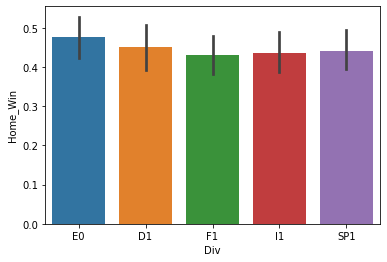

In [319]:
sns.barplot(data=over_red,x="Div",y="Home_Win")

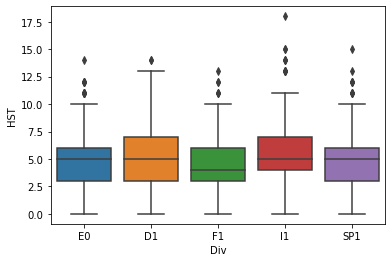

In [320]:
# Draw a nested barplot by species and sex
sns.boxplot(data=over_red,x='Div',y='HST')

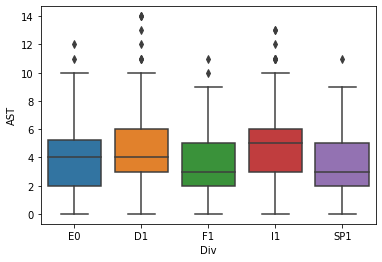

In [321]:
sns.boxplot(data=over_red,x='Div',y='AST')

## Methods & Results

### Modeling Home Field Advantage

In order to answer our questions of interest, several machine learning models were considered for predicting home wins, and the data was divided using a 30-70 split into a training and test dataset with missing values being imputed with the mean for that variable.

Because our model will contain 14 explanatory variables, regression models like ridge, lasso, and k nearest neighbors were used to help determine which factors of the model were of most importance while penalizing less signficant factors in the model. For comparison, decision tree, multinomial naive bayes, and support vector regression models were also considered. In order to assess model performance, the mean squared error will be assessed for both the training and testing datasets to uncover any under or over fitting of the data. This was coupled with the f1 and accuracy score for each model.

In [322]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [341]:
#Split the data into explanatory and response variables and train and test data
y = soccer_df['Home_Win']
X = soccer_df[['FTHG','FTAG','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]

from sklearn.impute import SimpleImputer
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.30, random_state=100)

#Impute missing values with the mean
Xtrain = Xtrain.fillna(Xtrain.mean())
Xtest = Xtest.fillna(Xtest.mean())

### Fitting Initial Models

In [332]:
lm = LinearRegression()
lm.fit(Xtrain,ytrain)
yhat_test = lm.predict(Xtest)
yhat_train = lm.predict(Xtrain)

mse_lm_tt = mean_squared_error(ytest, yhat_test)
print(np.sqrt(mean_squared_error(ytest, yhat_test)),np.sqrt(mse_lm_tt))

print(accuracy_score(ytest,yhat_test.round()))
print(f1_score(ytest,yhat_test.round(),average='weighted'))

0.3041629586642579 0.3041629586642579
0.9817518248175182
0.9880003726973718


In [326]:
lasso = Lasso(alpha=0.5)
lasso.fit(Xtrain,ytrain)
yhat_lasso_train = lasso.predict(Xtrain)
yhat_lasso = lasso.predict(Xtest)

mse_lass_train = mean_squared_error(ytrain,yhat_lasso_train)
mse_lass = mean_squared_error(ytest, yhat_lasso)
print(np.sqrt(mse_lass_train),np.sqrt(mse_lass))

print(accuracy_score(ytest,yhat_lasso.round()))
print(f1_score(ytest,yhat_lasso.round(),average='weighted'))

0.4968158880128808 0.4982361444356948
0.5437956204379562
0.3830995151075909


In [327]:
ridge = Ridge()
ridge.fit(Xtrain,ytrain)
yhat_ridge_train = ridge.predict(Xtrain)
yhat_ridge = ridge.predict(Xtest)

mse_ridge_train = mean_squared_error(ytrain,yhat_ridge_train)
mse_ridge = mean_squared_error(ytest, yhat_ridge)
print(np.sqrt(mse_ridge_train),np.sqrt(mse_ridge))

print(accuracy_score(ytest,yhat_ridge.round()))
print(f1_score(ytest,yhat_ridge.round(),average='weighted'))

0.42732080214141693 0.4207871056399023
0.7317518248175182
0.7302682346959217


In [328]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(Xtrain,ytrain)
yhat_knn_train = knn.predict(Xtrain)
yhat_knn = knn.predict(Xtest)

mse_knn_train = mean_squared_error(ytrain,yhat_knn_train)
mse_knn = mean_squared_error(ytest, yhat_knn)
print(np.sqrt(mse_knn_train),np.sqrt(mse_knn))

print(accuracy_score(ytest,yhat_knn.round()))
print(f1_score(ytest,yhat_knn.round(),average='weighted'))

0.42364577579504176 0.4553213351559261
0.6843065693430657
0.6781331687504717


In [329]:
dt = DecisionTreeRegressor(min_samples_leaf=3)
dt.fit(Xtrain,ytrain)
yhat_dt_train = dt.predict(Xtrain)
yhat_dt = dt.predict(Xtest)

mse_dt_train = mean_squared_error(ytrain,yhat_dt_train)
mse_dt = mean_squared_error(ytest, yhat_dt)
print(np.sqrt(mse_dt_train),np.sqrt(mse_dt))

print(accuracy_score(ytest,yhat_dt.round()))
print(f1_score(ytest,yhat_dt.round(),average='weighted'))

0.2419545260930704 0.565108958193888
0.614963503649635
0.6141216258769174


In [330]:
nb = MultinomialNB()
nb.fit(Xtrain, ytrain)
yhat_nb_train = nb.predict(Xtrain)
yhat_nb = nb.predict(Xtest)

mse_nb_train = mean_squared_error(ytrain,yhat_nb_train)
mse_nb = mean_squared_error(ytest,yhat_nb)
print(np.sqrt(mse_nb_train),np.sqrt(mse_nb))

print(accuracy_score(ytest,yhat_nb.round()))
print(f1_score(ytest,yhat_nb.round(),average='weighted'))

0.5800545007041731 0.5778768085322477
0.666058394160584
0.6660034664200571


In [172]:
svr = SVR()
svr.fit(Xtrain, ytrain)
yhat_svr_train = svr.predict(Xtrain)
yhat_svr = svr.predict(Xtest)

mse_svr_train = mean_squared_error(ytrain,yhat_svr_train)
mse_svr = mean_squared_error(ytest, yhat_svr)
print(np.sqrt(mse_svr_train),np.sqrt(mse_svr))

print(accuracy_score(ytest,yhat_svr.round()))
print(f1_score(ytest,yhat_svr.round(),average='weighted'))

0.2832441262466822 0.30408745703625445
0.9105839416058394
0.914425392401046


### Model Improvement & Optimization

Based on the mean squared error, accuracy score, and f1 score for each model, several models seemed to have performed well while others appear to have overfit the data. Because the mse both the support vector and decision tree regression models was quite a bit higher for the testing than the training data, it appears these models overfit the data and will no longer be considered.

The Lasso, Ridge, and K Nearest Neighbors models all seemed to perform the best without overfitting, based on their f1 and accuracy scores as well as the mean squared errors. Using grid searching techniques, optimization was performed for each of the model's hyperparameters. For lasso, 100 different alpha tuning parameters were assessed and the optimal parameter can be seen below. A similar process was done for ridge, with 10 different tuning parameters. Lastly, k nearest neighbor tuning parameters with a range of 30 different groupings were performed. Each model was then fit once again using these optimized tuning parameters.

In [342]:
#Fit new Lasso model with optimized hyperparameter
from sklearn.linear_model import LassoCV
lscv = LassoCV(n_alphas=100, normalize=True)
lscv.fit(Xtrain, ytrain)

#lscv.alpha_

lasso = Lasso(alpha=lscv.alpha_)
lasso.fit(Xtrain,ytrain)
yhat_lasso = lasso.predict(Xtest)

mse_lass = mean_squared_error(ytest, yhat_lasso)
print(np.sqrt(mse_lass))
print(accuracy_score(ytest,yhat_lasso.round()))
print(f1_score(ytest,yhat_lasso.round(),average='weighted'))

0.30418486744295803
0.9817518248175182
0.9880003726973718


In [193]:
#Fit new Ridge model with optimized hyperparameter
from sklearn.linear_model import RidgeCV
alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1,0.5, 1,10,100]
ricv = RidgeCV(alphas=alphas, normalize=True)
ricv.fit(Xtrain, ytrain)

ridge = Ridge(ricv.alpha_)
ridge.fit(Xtrain,ytrain)
yhat_ridge_train = ridge.predict(Xtrain)
yhat_ridge = ridge.predict(Xtest)

mse_ridge_train = mean_squared_error(ytrain,yhat_ridge_train)
mse_ridge = mean_squared_error(ytest, yhat_ridge)
print(np.sqrt(mse_ridge))

print(accuracy_score(ytest,yhat_ridge.round()))
print(f1_score(ytest,yhat_ridge.round(),average='weighted'))

0.4207834229193695
0.7317518248175182
0.7302682346959217


In [194]:
#Fit new Knn model with optimized hyperparameter
parameters = {'n_neighbors':list(range(1,30))}
knn = KNeighborsRegressor()
clf = GridSearchCV(knn, parameters, cv=10, scoring='neg_mean_squared_error')
clf.fit(Xtrain, ytrain)

clf.best_params_

{'n_neighbors': 21}

In [195]:
knn = KNeighborsRegressor(n_neighbors=21)
knn.fit(Xtrain,ytrain)
yhat_knn = knn.predict(Xtest)

mse_knn = mean_squared_error(ytest, yhat_knn)
print(np.sqrt(mse_knn))
print(accuracy_score(ytest,yhat_knn.round()))
print(f1_score(ytest,yhat_knn.round(),average='weighted'))

0.45498036633875183
0.6879562043795621
0.6862303954626027


## Model Selection & Results

With optimized hyperparameters, both the Lasso and Ridge regression models performed the best in predicting home wins based on the explanatory variables, with f1 and accuracy scores of about 0.98. However, the lasso regression model had a lower mean squared error than the ridge model and will thus be considered in examining feature extraction and interpretation/

Based on an evaluation of feature importance from this optimized model, it appears that the most important factors in predicting home wins were goals scored, shots on target, and number of red cards each home and away team had. However, because goals scored are inseperable from the result of the game, a model was also considered that elminated this factor and is expounded on below. After accounting for this factor, the next most important factor in improving a win at home for the home team is shots on target followed by red cards received.

Feature: 0, Score: 0.23030
Feature: 1, Score: -0.18864
Feature: 2, Score: -0.00685
Feature: 3, Score: 0.00236
Feature: 4, Score: 0.00791
Feature: 5, Score: -0.00571
Feature: 6, Score: -0.00498
Feature: 7, Score: 0.00004
Feature: 8, Score: -0.00313
Feature: 9, Score: 0.00037
Feature: 10, Score: 0.00136
Feature: 11, Score: -0.00477
Feature: 12, Score: -0.04249
Feature: 13, Score: 0.04125


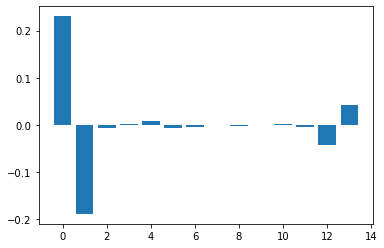

In [334]:
# get importance
importance = lasso.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Examining a Model without Goals as an Explanatory Variable

In [335]:
#Model without Goals
y_n = soccer_df['Home_Win']
X_n = soccer_df[['HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]

from sklearn.impute import SimpleImputer
Xtrain, Xtest, ytrain, ytest = train_test_split(X_n, y_n, test_size=.30, random_state=100)

#Impute missing values with the mean
Xtrain = Xtrain.fillna(Xtrain.mean())
Xtest = Xtest.fillna(Xtest.mean())

In [336]:
#Fit new Lasso model with updated hyperparameter and data without goals
from sklearn.linear_model import LassoCV
lscv = LassoCV(n_alphas=100, normalize=True)
lscv.fit(Xtrain, ytrain)

#lscv.alpha_

lasso = Lasso(alpha=lscv.alpha_)
lasso.fit(Xtrain,ytrain)
yhat_lasso = lasso.predict(Xtest)

mse_lass = mean_squared_error(ytest, yhat_lasso)
print(np.sqrt(mse_lass))
print(accuracy_score(ytest,yhat_lasso.round()))
print(f1_score(ytest,yhat_lasso.round(),average='weighted'))

0.42079149568745594
0.7317518248175182
0.7302682346959217


Feature: 0, Score: -0.01398
Feature: 1, Score: 0.00757
Feature: 2, Score: 0.08074
Feature: 3, Score: -0.07494
Feature: 4, Score: -0.00690
Feature: 5, Score: -0.00272
Feature: 6, Score: -0.01955
Feature: 7, Score: 0.00802
Feature: 8, Score: -0.02004
Feature: 9, Score: -0.00036
Feature: 10, Score: -0.13964
Feature: 11, Score: 0.09090


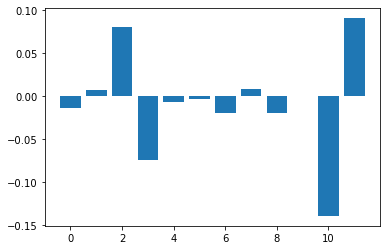

In [337]:
# get importance
importance = lasso.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Conclusions
Based on the results of the regression modeling, it appears that the most important factor for improving a win at home was goals. This is no surprise since it is the single most determining factor for which a result is determined. The next most important feature for improving win likelihood at home was shots on target, with the away team's number of shots on target having a nearly equal effect but in the negative.

This means that if a team focuses on accuracy rather than quantity of shots, their overall probability of winning may increase. It may also mean that great defending that keeps an away team from getting their own shots on target would also increase win probability.

Lastly, the third most important factor for increasing win likelihood at home for the home team is red cards. When a player receives a red card in any match, they must immediately leave the pitch and they cannot be replaced. This results in the player's team having to play with 10 instead of 11 players on the field for the remainder of the match. Thus, the model shows that a home team receiving a red card will more negatively impact their likelihood of winning than any other factor. Likewise, an away team receiving a red card will improve win likelihood more than any other factor.

While controlling the amount of red cards an away team recevies is not in the power of the home team to change, they can exhibit extreme caution for their own team, ensuring that their players remain level-headed and don't commit any offense that would result in them having to leave the pitch due to a red card. Perhaps coaches could do so by encouraging good sportsmanship among their players and pulling players that start to show signs of losing their temper or getting unnecessarily aggressive towards an opposing player.


### Questions & Improvements for Future Study
One question that arises from the results of this analysis is what other factors might be affected by playing at home, negatively or positively? For example, perhaps pass accuracy or number of tackles also increase when a team plays on their home field, how might these affect the likelihood of winning?

It should be noted as well that a model that does not include red cards received would perhaps highlight more clearly the differences in variables of somewhat less significance. Obtaining a larger sample size over more years of data would also be an interesting way to see if these factors of red cards and shots on target would still remain significant or if others would overtake them.